## Starter file for assignment on Exploratory Data Analysis
### Author: Afra Nawar, 2087862

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from IPython.display import display
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
#load dataset
file_path = "air_quality.csv"
df = pd.read_csv(file_path)

In [3]:
#display first few rows
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [4]:
#check for missing values
missing_values = df.isnull().sum()

In [5]:
#class_labels for air quality
air_quality_labels = {
    "Hazardous": 1,
    "Poor": 2,
    "Moderate": 3,
    "Good": 4
}
df["Air Quality"] = df["Air Quality"].map(air_quality_labels)

In [6]:
#display summary stats
summary_stats = df.describe()
missing_values, summary_stats

(Temperature                      0
 Humidity                         0
 PM2.5                            0
 PM10                             0
 NO2                              0
 SO2                              0
 CO                               0
 Proximity_to_Industrial_Areas    0
 Population_Density               0
 Air Quality                      0
 dtype: int64,
        Temperature     Humidity        PM2.5         PM10          NO2  \
 count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
 mean     30.029020    70.056120    20.142140    30.218360    26.412100   
 std       6.720661    15.863577    24.554546    27.349199     8.895356   
 min      13.400000    36.000000     0.000000    -0.200000     7.400000   
 25%      25.100000    58.300000     4.600000    12.300000    20.100000   
 50%      29.000000    69.800000    12.000000    21.700000    25.300000   
 75%      34.000000    80.300000    26.100000    38.100000    31.900000   
 max      58.600000   128

<function matplotlib.pyplot.show(close=None, block=None)>

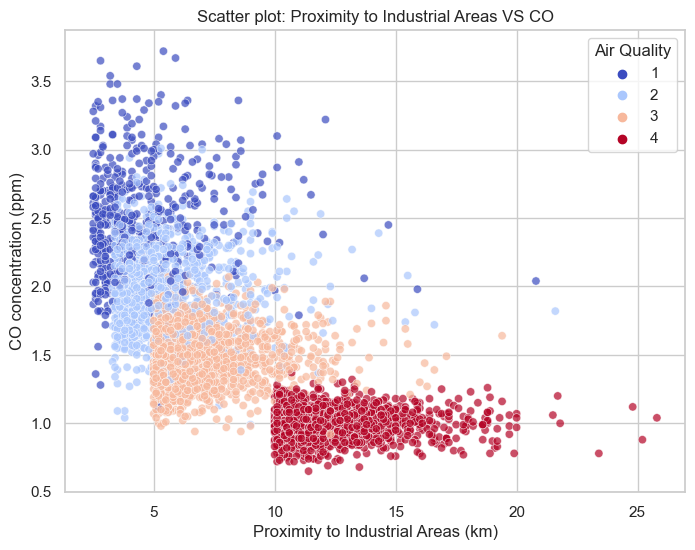

In [7]:
#Data Analysis
sns.set(style="whitegrid")

#supervised scatter plot for the attributes "Proximity to Industrial Areas" and "CO"
plt.figure(figsize = (8,6))
sns.scatterplot(
    x = df["Proximity_to_Industrial_Areas"],
    y = df["CO"],
    hue = df["Air Quality"],
    palette = "coolwarm",
    alpha = 0.7
)
plt.xlabel("Proximity to Industrial Areas (km)")
plt.ylabel("CO concentration (ppm)")
plt.title("Scatter plot: Proximity to Industrial Areas VS CO")
plt.legend( title= "Air Quality")#labels = ["Hazardous (1)", "Poor (2)", "Moderate (3)", "Good (4)"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

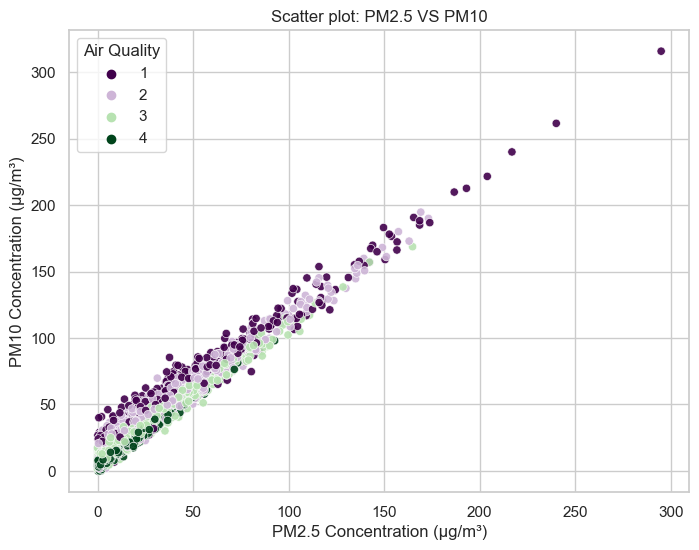

In [8]:
plt.figure(figsize = (8,6))
sns.scatterplot(
    x = df["PM2.5"],
    y = df["PM10"],
    hue = df["Air Quality"],
    palette =  "PRGn",
    alpha = 0.9
)

plt.xlabel("PM2.5 Concentration (µg/m³)")
plt.ylabel("PM10 Concentration (µg/m³)")
plt.title("Scatter plot: PM2.5 VS PM10")

plt.legend( title= "Air Quality")
plt.show

C:\Users\afran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


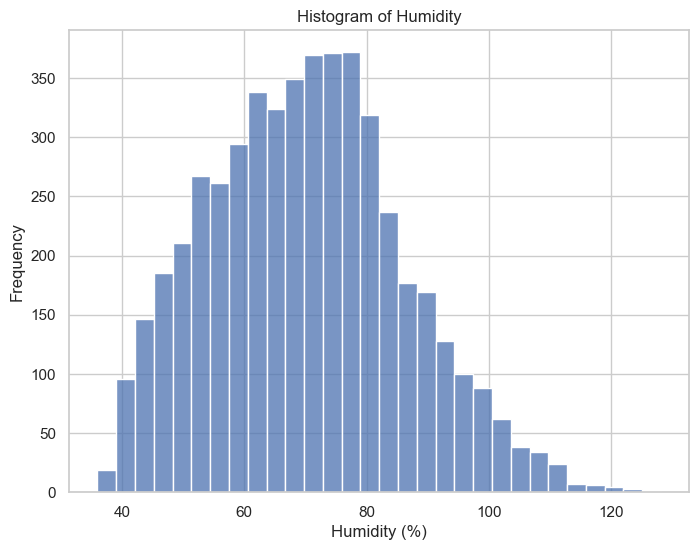

{'Mean': 70.05611999999999,
 'Standard Deviation': 15.861990245413729,
 'Median': 69.8}

In [9]:
#Histogram for "Humididty" with 30 bins
plt.figure(figsize= (8,6))
sns.histplot(df["Humidity"], bins = 30)
plt.xlabel("Humidity (%)")
plt.ylabel("Frequency")
plt.title("Histogram of Humidity")
plt.show()

humidity_stats = {
    "Mean" : np.mean(df["Humidity"]),
    "Standard Deviation": np.std(df["Humidity"]),
    "Median" : np.median(df["Humidity"])
}
humidity_stats

C:\Users\afran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


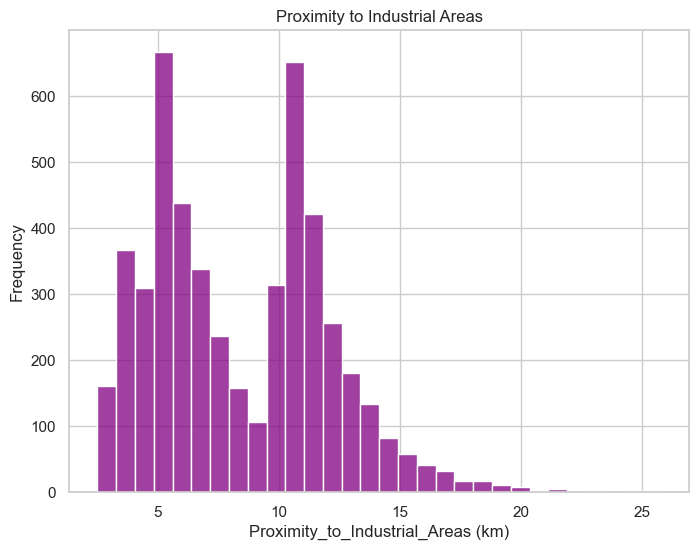

{'Mean': 8.4254, 'Standard Deviation': 3.6105826178055773, 'Median': 7.9}

In [12]:
#Histogram for "Proximity to Industrial Areas" with 30 bins
plt.figure(figsize= (8,6))
sns.histplot(df["Proximity_to_Industrial_Areas"], bins = 30, color = "purple")
plt.xlabel("Proximity_to_Industrial_Areas (km)")
plt.ylabel("Frequency")
plt.title("Proximity to Industrial Areas")
plt.show()

#mean,sd, median for proximity
proximity_stats = {
    "Mean" : np.mean(df["Proximity_to_Industrial_Areas"]),
    "Standard Deviation": np.std(df["Proximity_to_Industrial_Areas"]),
    "Median" : np.median(df["Proximity_to_Industrial_Areas"])
}
proximity_stats

In [ ]:
#supervised  scatter plot for attributes "Temperature", "PM2.5", "CO" and "Proximity to Industrial Areas"
plt.figure(figsize= (8,6))
scatter_attributes = ["Temperature", "PM2.5", "CO", "Proximity_to_Industrial_Areas","Air Quality"]
sns.pairplot(df[scatter_attributes], hue = "Air Quality")
plt.title("scatter plot ")
plt.show()


C:\Users\afran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\afran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\afran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\afran\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

In [ ]:
#compute Pearson correlation
correlation_matrix = df[scatter_attributes].corr()

#display
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Matrix")
plt.show()
correlation_matrix

In [ ]:
#Extract PM2.5 values for "Poor" air quality (Numerical Level: 2)
pm25_poor = df[df["Air Quality"] == 2]["PM2.5"]

#Create a box plot for PM2.5 in "Poor" Air Quality category
plt.figure(figsize=(6, 6))
sns.boxplot(y=pm25_poor, color="red")
plt.ylabel("PM2.5 Concentration (µg/m³)")
plt.title("Box Plot of PM2.5 for Poor Air Quality")
plt.show()

#Compute box plot statistics
q1 = np.percentile(pm25_poor, 25)
median = np.median(pm25_poor)
q3 = np.percentile(pm25_poor, 75)
iqr = q3 - q1
minimum = q1 - 1.5 * iqr
maximum = q3 + 1.5 * iqr

#Count number of outliers 
outliers = pm25_poor[(pm25_poor < minimum) | (pm25_poor > maximum)]

# Display results
pm25_boxplot_stats = {
    "Q1 (25th percentile)": q1,
    "Median (50th percentile)": median,
    "Q3 (75th percentile)": q3,
    "IQR (Interquartile Range)": iqr,
    "Minimum (Without Outliers)": minimum,
    "Maximum (Without Outliers)": maximum,
    "Number of Outliers": len(outliers),
    "Skewness": "Right-skewed" if median - q1 < q3 - median else "Left-skewed"
}

pm25_boxplot_stats

In [ ]:
#Extract CO values for "Poor" and "Moderate" air quality levels
co_poor = df[df["Air Quality"] == 2]["CO"]
co_moderate = df[df["Air Quality"] == 3]["CO"]

#Create a box plot comparing CO for Poor and Moderate Air Quality
plt.figure(figsize=(8, 6))
sns.boxplot(data=[co_poor, co_moderate], palette=["red", "blue"])
plt.xticks([0, 1], ["Poor Air Quality", "Moderate Air Quality"])
plt.ylabel("CO Concentration (ppm)")
plt.title("Box Plot of CO for Poor vs. Moderate Air Quality")
plt.show()

#Compute summary statistics for both classes
co_boxplot_stats = {
    "Poor Air Quality": {
        "Q1": np.percentile(co_poor, 25),
        "Median": np.median(co_poor),
        "Q3": np.percentile(co_poor, 75),
        "IQR": np.percentile(co_poor, 75) - np.percentile(co_poor, 25),
        "Min (Without Outliers)": np.percentile(co_poor, 25) - 1.5 * (np.percentile(co_poor, 75) - np.percentile(co_poor, 25)),
        "Max (Without Outliers)": np.percentile(co_poor, 75) + 1.5 * (np.percentile(co_poor, 75) - np.percentile(co_poor, 25))
    },
    "Moderate Air Quality": {
        "Q1": np.percentile(co_moderate, 25),
        "Median": np.median(co_moderate),
        "Q3": np.percentile(co_moderate, 75),
        "IQR": np.percentile(co_moderate, 75) - np.percentile(co_moderate, 25),
        "Min (Without Outliers)": np.percentile(co_moderate, 25) - 1.5 * (np.percentile(co_moderate, 75) - np.percentile(co_moderate, 25)),
        "Max (Without Outliers)": np.percentile(co_moderate, 75) + 1.5 * (np.percentile(co_moderate, 75) - np.percentile(co_moderate, 25))
    }
}

co_boxplot_stats

In [ ]:
#Define features
features = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 
            'Proximity_to_Industrial_Areas', 'Population_Density']

#Extract numerical data
X = df[features]

#Perform PCA without normalization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

#create a DataFrame with PCA results
pca_df = pd.DataFrame(pca_components, columns=["PC1", "PC2"])
pca_df["Air Quality"] = df["Air Quality"]  # Keep Air Quality for visualization

#scatter plot for PCA without normalization
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="Air Quality", data=pca_df, palette="flare", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot (Without Normalization)")
plt.legend(title="Air Quality")
plt.show()

#Create PCA Component Matrix 
pca_components_no_norm = pd.DataFrame(pca.components_, columns=features, index=["PC1", "PC2"])

# Display the factor loadings table
print("PCA Factor Loadings (Without Normalization):")
display(pca_components_no_norm)


#normalize using Z-Score and perform PCA again
scaler_zscore = StandardScaler()
X_zscore = scaler_zscore.fit_transform(X)

pca_zscore = PCA(n_components=2)
pca_components_zscore = pca_zscore.fit_transform(X_zscore)

#create DataFrame for Z-score normalized PCA
pca_zscore_df = pd.DataFrame(pca_components_zscore, columns=["PC1", "PC2"])
pca_zscore_df["Air Quality"] = df["Air Quality"]

#scatter plot for PCA with Z-score normalization
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="Air Quality", data=pca_zscore_df, palette="flare", alpha=0.7)
plt.xlabel("Principal Component 1 (Z-Score)")
plt.ylabel("Principal Component 2 (Z-Score)")
plt.title("PCA Scatter Plot (Z-Score Normalized Data)")
plt.legend(title="Air Quality")
plt.show()
pca_components_zscore_matrix = pd.DataFrame(pca_zscore.components_, columns=features, index=["PC1", "PC2"])

# Display the factor loadings table 
print("PCA Factor Loadings (Z-score):")
display(pca_components_zscore_matrix)

#Normalize using Min-Max Scaling and perform PCA again
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

pca_minmax = PCA(n_components=2)
pca_components_minmax = pca_minmax.fit_transform(X_minmax)

#Create DataFrame for Min-Max normalized PCA
pca_minmax_df = pd.DataFrame(pca_components_minmax, columns=["PC1", "PC2"])
pca_minmax_df["Air Quality"] = df["Air Quality"]

#Scatter plot for PCA with Min-Max normalization
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="Air Quality", data=pca_minmax_df, palette="flare", alpha=0.7)
plt.xlabel("Principal Component 1 (Min-Max)")
plt.ylabel("Principal Component 2 (Min-Max)")
plt.title("PCA Scatter Plot (Min-Max Normalized Data)")
plt.legend(title="Air Quality")
plt.show()

#Create PCA Component Matrix for Min-Max Normalization
pca_components_minmax_matrix = pd.DataFrame(pca_minmax.components_, columns=features, index=["PC1", "PC2"])

#Display the table
print("PCA Factor Loadings (Min-Max):")
display(pca_components_minmax_matrix)